In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

folder = "LT_optimization_1_basecase"
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

In [14]:
all_dfs = pd.DataFrame(columns=['name', 'phi_standing', 'electricity_price', 'drilling_costs', 'Capex_TTES', 'objective_value', 'total_heat_supplied', 'costs_per_MWh'])


for f in csv_files:
    name = f
    f = pd.read_csv(os.path.join(folder, f))

    df_aux = pd.DataFrame({
        'name': [name],
        'phi_standing': [f['phi_standing'].iloc[0]],
        'electricity_price': [f['electricity_price'].iloc[0]],
        'drilling_costs': [f['drilling_costs'].iloc[0]],
        'Capex_TTES': [f['Capex_TTES'].iloc[0]],
        'objective_value': [f['objective_value'].iloc[0]],
        'total_heat_supplied': [f['total_heat_supplied'].iloc[0]],
        'costs_per_MWh_produced': [f['costs_per_MWh_produced'].iloc[0]],
        'costs_per_MWh_demand': [f['costs_per_MWh_demand'].iloc[0]],
    })
    all_dfs = pd.concat([all_dfs, df_aux], ignore_index=True)




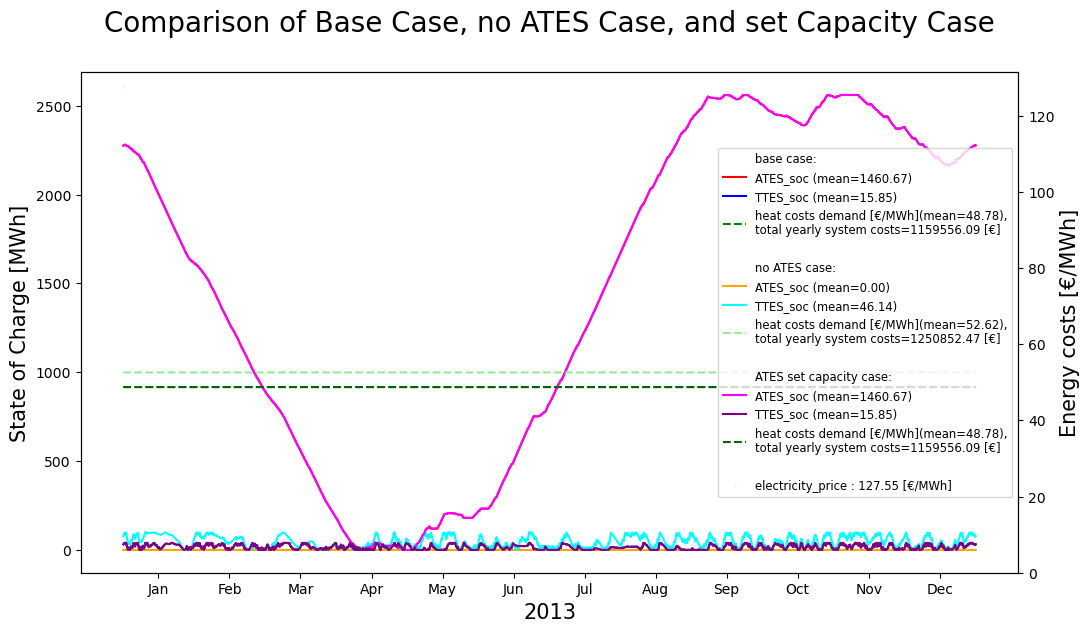

In [9]:
from datetime import datetime

os.makedirs("RESULTS_PDFs", exist_ok=True)
today_str = datetime.today().strftime('%Y-%m-%d')
pdf_path = os.path.join(f"RESULTS_PDFs/LT_basecase_no_ATES_setcap_comparison_demand.pdf")

num_group_files = len(all_dfs)
rainbow_cmap = np.array(['red', 'blue', 'green', 'orange', 'cyan', 'lightgreen', 'magenta', 'purple', 'darkgreen'])

plt.figure(figsize=(15, 6.5))
plt.subplots_adjust(right=0.75)  # Make space on the right for the legend

ax1 = plt.gca()
ax2 = ax1.twinx()

handles = []
labels = []
case = np.array(['base case', 'no ATES case', 'ATES set capacity case'])
color_idx = 0
for i, fname in enumerate(all_dfs['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    color = rainbow_cmap[color_idx+2]
    mean_heatcosts = df['costs_per_MWh_demand'].mean()
    h3, = ax2.plot(df['costs_per_MWh_demand'], color=color, label=f'{case[i]} energy_balance (mean={mean_heatcosts:.2f})', linestyle='--')
    handles.extend([h1, h2, h3])
    labels.extend([
        f'ATES_soc (mean={df["ATES_soc"].mean():.2f})',
        f'TTES_soc (mean={df["TTES_soc"].mean():.2f})',
        f'heat costs demand [€/MWh](mean={mean_heatcosts:.2f}),\ntotal yearly system costs={df["objective_value"].iloc[0]:.2f} [€]'
    ])  

    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append('')
    color_idx += 3



ates_i_temp_df = pd.read_csv(os.path.join("csv_and_xlsx/Analysis_I_temp_time.csv"))
h5, = ax2.plot(ates_i_temp_df['electricity_price'].mean(), color='black', label='electricity_price', linestyle='', marker='.', markersize=0.1)
handles.extend([h5])
labels.extend([f'electricity_price : {ates_i_temp_df["electricity_price"].mean():.2f} [€/MWh]'])


ax1.set_title('Comparison of Base Case, no ATES Case, and set Capacity Case\n', fontsize=20)#, fontweight='bold'
ax1.set_xlabel('2013', fontsize=15)
ax1.set_ylabel('State of Charge [MWh]', fontsize=15)
ax2.set_ylabel('Energy costs [€/MWh]', fontsize=15)
ax2.set_ylim(bottom=0)

df_months = pd.to_datetime(df['datetime'])
months = df_months.dt.month
month_names = df_months.dt.strftime('%b')
month_positions = [i for i in range(len(months)) if (i == 0 or months[i] != months[i-1])]
month_labels = [month_names[i] for i in month_positions]

tick_locs = range(15*24, len(df['datetime']), 8760 // 12)
tick_labels = pd.to_datetime(df['datetime']).dt.strftime('%b')[list(tick_locs)]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)

plt.legend(handles, labels, fontsize='small', loc='center right')

plt.savefig(pdf_path, format='pdf')
plt.show()


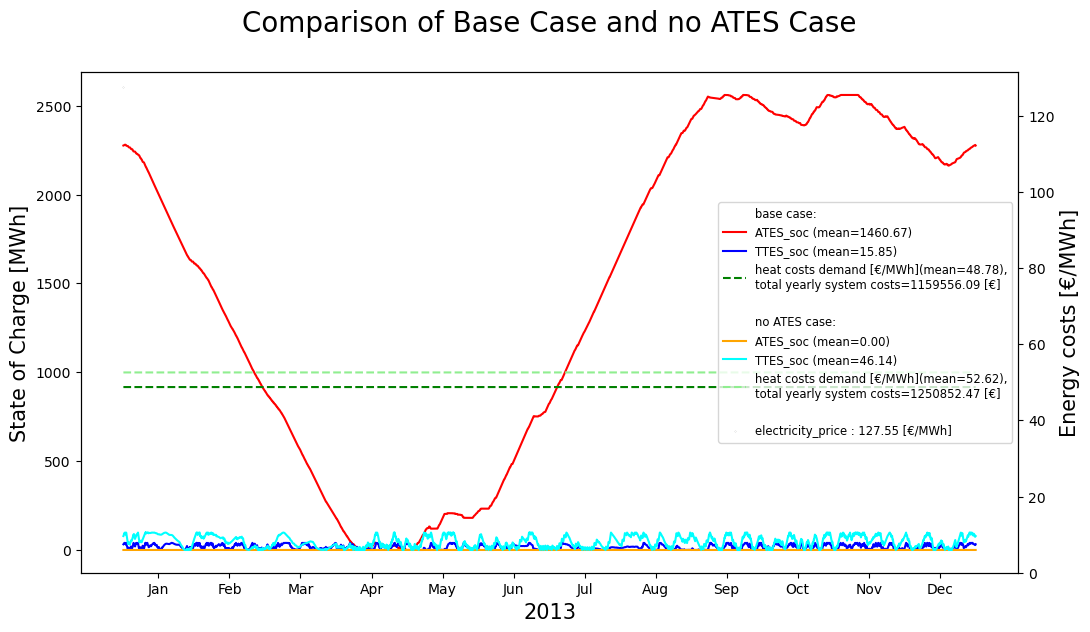

In [10]:
from datetime import datetime
all_dfs_aux = all_dfs.iloc[[0, 1]]

os.makedirs("RESULTS_PDFs", exist_ok=True)
today_str = datetime.today().strftime('%Y-%m-%d')
pdf_path = os.path.join(f"RESULTS_PDFs/LT_basecase_no_ATES_comparison_demand.pdf")

num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'green', 'orange', 'cyan', 'lightgreen'])

plt.figure(figsize=(15, 6.5))
plt.subplots_adjust(right=0.75)  # Make space on the right for the legend

ax1 = plt.gca()
ax2 = ax1.twinx()

handles = []
labels = []
case = np.array(['base case', 'no ATES case'])
color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    color = rainbow_cmap[color_idx+2]
    mean_heatcosts = df['costs_per_MWh_demand'].mean()
    h3, = ax2.plot(df['costs_per_MWh_demand'], color=color, label=f'{case[i]} energy_balance (mean={mean_heatcosts:.2f})', linestyle='--')
    handles.extend([h1, h2, h3])
    labels.extend([
        f'ATES_soc (mean={df["ATES_soc"].mean():.2f})',
        f'TTES_soc (mean={df["TTES_soc"].mean():.2f})',
        f'heat costs demand [€/MWh](mean={mean_heatcosts:.2f}),\ntotal yearly system costs={df["objective_value"].iloc[0]:.2f} [€]'
    ])  

    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append('')
    color_idx += 3



ates_i_temp_df = pd.read_csv(os.path.join("csv_and_xlsx/Analysis_I_temp_time.csv"))
h5, = ax2.plot(ates_i_temp_df['electricity_price'].mean(), color='black', label='electricity_price', linestyle='', marker='.', markersize=0.1)
handles.extend([h5])
labels.extend([f'electricity_price : {ates_i_temp_df["electricity_price"].mean():.2f} [€/MWh]'])


ax1.set_title('Comparison of Base Case and no ATES Case\n', fontsize=20)#, fontweight='bold'
ax1.set_xlabel('2013', fontsize=15)
ax1.set_ylabel('State of Charge [MWh]', fontsize=15)
ax2.set_ylabel('Energy costs [€/MWh]', fontsize=15)
ax2.set_ylim(bottom=0)

df_months = pd.to_datetime(df['datetime'])
months = df_months.dt.month
month_names = df_months.dt.strftime('%b')
month_positions = [i for i in range(len(months)) if (i == 0 or months[i] != months[i-1])]
month_labels = [month_names[i] for i in month_positions]

tick_locs = range(15*24, len(df['datetime']), 8760 // 12)
tick_labels = pd.to_datetime(df['datetime']).dt.strftime('%b')[list(tick_locs)]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)

plt.legend(handles, labels, fontsize='small', loc='center right')

plt.savefig(pdf_path, format='pdf')
plt.show()


In [11]:
all_dfs

,name,phi_standing,electricity_price,drilling_costs,Capex_TTES,objective_value,total_heat_supplied,costs_per_MWh,costs_per_MWh_produced,costs_per_MWh_demand
0,ATES_default_phi_s_0.999971_elp_1_drc_1000_Cap...,0.999971,1,1000,3036.1,1.159556e+06,24663.035826,NaN,47.015951,48.776870
1,ATES_NoCap_phi_s_0.999971_elp_1_drc_1000_CapTT...,0.999971,1,1000,3036.1,1.250852e+06,23800.463602,NaN,52.555803,52.617263
2,ATES_SetCap_phi_s_0.999971_elp_1_drc_1000_CapT...,0.999971,1,1000,3036.1,1.159556e+06,24663.035826,NaN,47.015951,48.776870


In [12]:
# Import the ATES_SetCap... file as a dataframe and get the lowest value for ATES_soc
ates_setcap_filename = [f for f in csv_files if f.startswith('ATES_SetCap')][0]
ates_setcap_df = pd.read_csv(os.path.join(folder, ates_setcap_filename))
lowest_ates_soc = ates_setcap_df['ATES_soc'].min()
print("Lowest ATES_soc value:", lowest_ates_soc)

Lowest ATES_soc value: 0.0
